In [1]:
import pledget as leg
from hmr import Reloader
leg = Reloader(leg)

In [2]:
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [3]:
from matplotlib.offsetbox import HPacker, AnchoredOffsetbox

In [4]:
x = np.arange(1, 10, 1)
y = np.arange(1, 10, 1)

In [5]:
from matplotlib import cm
from matplotlib.offsetbox import DrawingArea
from matplotlib.legend import Legend
from matplotlib.artist import Artist
from matplotlib.patches import Rectangle, Ellipse, Circle
from matplotlib.colors import Normalize
from matplotlib.colorbar import Colorbar

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

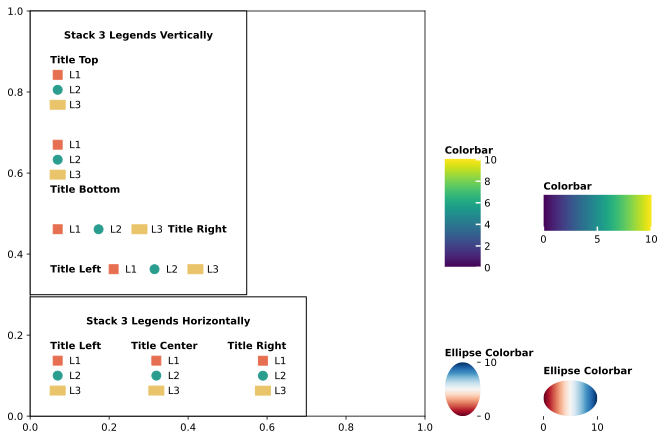

In [11]:
legend_items=[
        ('square', 'L1', {'color': "#e76f51"}),
        ('circle', 'L2', {'color': "#2a9d8f"}),
        ('rect', 'L3', {'color': "#e9c46a"}),
    ]
fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)
legend1 = leg.ListLegend(legend_items=legend_items, title="Title Left", title_align="left")
legend2 = leg.ListLegend(legend_items=legend_items, title="Title Center", title_align="center")
legend3 = leg.ListLegend(legend_items=legend_items, title="Title Right", title_align="right")

s1 = leg.hstack([legend1, legend2, legend3], spacing=30, frameon=True, title="Stack 3 Legends Horizontally")
ax.add_artist(s1)

legend1 = leg.ListLegend(legend_items=legend_items, title="Title Top", title_pos="top", title_align="left")
legend2 = leg.ListLegend(legend_items=legend_items, title="Title Bottom", title_pos="bottom", title_align="left")
legend3 = leg.ListLegend(legend_items=legend_items, title="Title Right", title_pos="right", ncol=3)
legend4 = leg.ListLegend(legend_items=legend_items, title="Title Left", title_pos="left", ncol=3)

s2 = leg.vstack([legend1, legend2, legend3, legend4], spacing=30, frameon=True, loc="upper left", title="Stack 3 Legends Vertically")
ax.add_artist(s2)

leg.Colorbar(vmin=0, vmax=10, title="Colorbar", title_align="left")
leg.Colorbar(vmin=0, vmax=10, title="Colorbar", title_align="left", orientation="horizontal", 
             bbox_to_anchor=(1.3, 0.5, 0, 0), bbox_transform=ax.transAxes)

leg.EllipseColorbar(vmin=0, vmax=10, cmap="RdBu", bbox_to_anchor=(1.05, 0, 0, 0), title="Ellipse Colorbar", title_align="left",
                    loc="lower left", bbox_transform=ax.transAxes)

leg.EllipseColorbar(vmin=0, vmax=10, cmap="RdBu", bbox_to_anchor=(1.3, 0, 0, 0), title="Ellipse Colorbar", title_align="left",
                    orientation="horizontal", 
                    loc="lower left", bbox_transform=ax.transAxes)

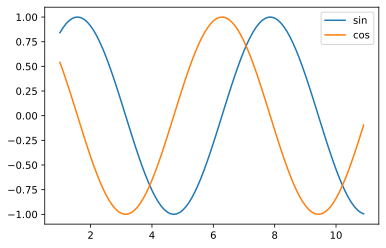

In [7]:
x = np.arange(1, 11, 0.1)
plt.plot(x, np.sin(x), label="sin")
plt.plot(x, np.cos(x), label="cos")
plt.legend()

<ListLegend>

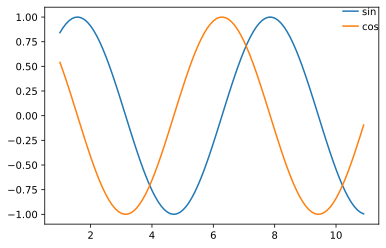

In [9]:
x = np.arange(1, 11, 0.1)
plt.plot(x, np.sin(x), label="sin")
plt.plot(x, np.cos(x), label="cos")
leg.ListLegend()

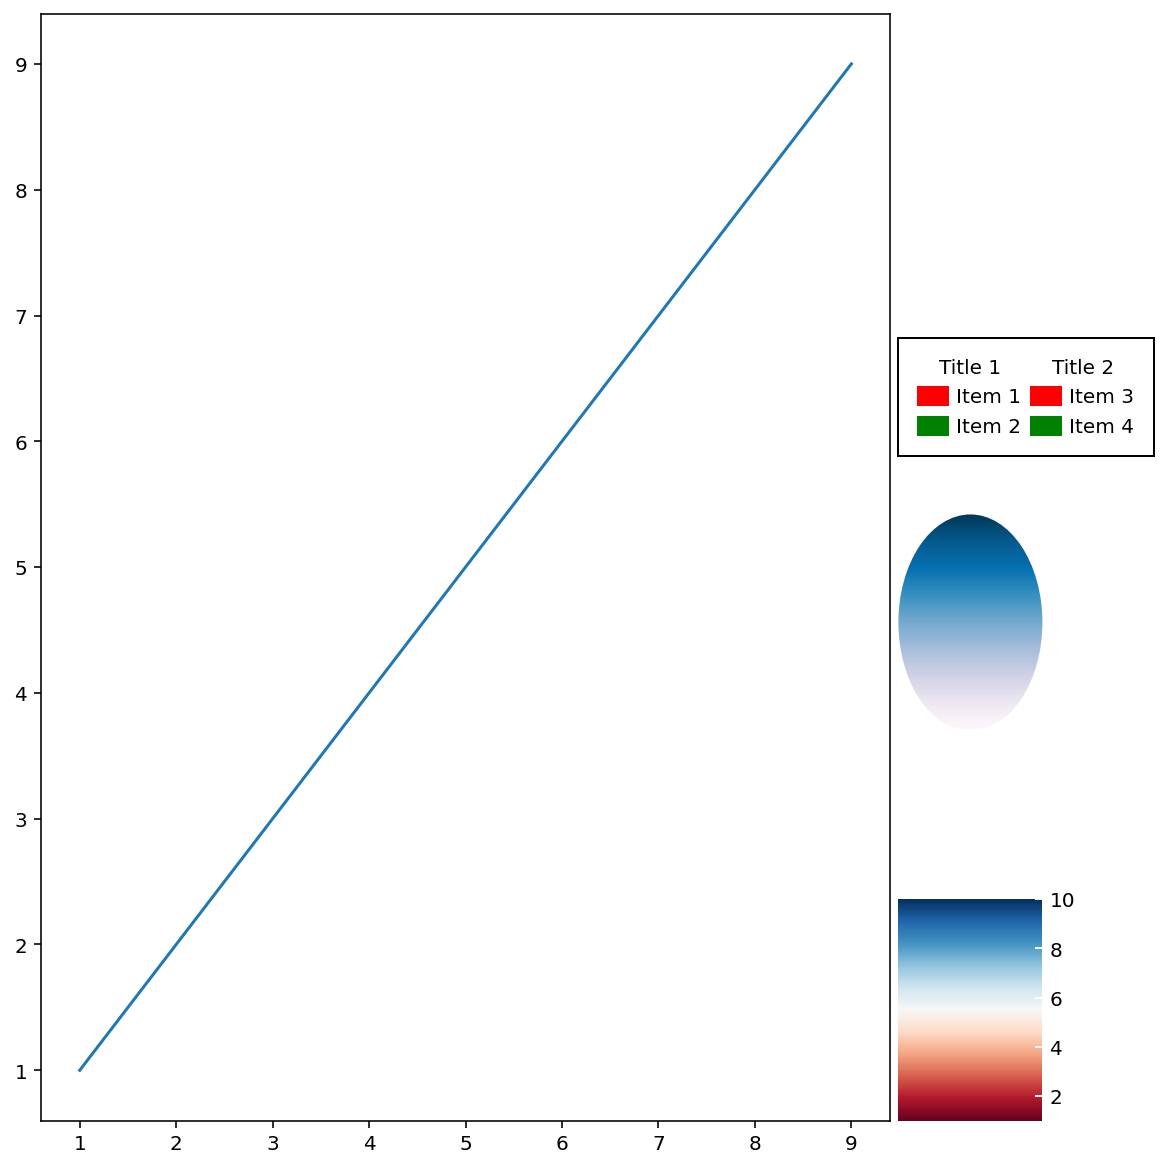

In [7]:
fig, ax = plt.subplots(figsize=(8, 8), constrained_layout=True)

ax.plot(x, y)
legend1 = Legend(ax, handles=[
    Patch(color="r", label="Item 1"),
    Patch(color="green", label="Item 2"),
], labels=["Item 1", "Item 2"], title="Title 1")
legend2 = Legend(ax, handles=[
    Patch(color="r", label="Item 3"),
    Patch(color="green", label="Item 4"),
], labels=["Item 3", "Item 4"], title="Title 2")
box1 = DrawingArea(60, 60, 0, 0)
box2 = DrawingArea(60, 60, 0, 0)
# box1.add_artist()
# box2.add_artist()

pack = HPacker(children=[legend1._legend_box, legend2._legend_box], mode="fixed", pad=0, sep=5, align="center")
box = AnchoredOffsetbox(loc="lower left", child=pack, frameon=True,
                        bbox_to_anchor=(1.01, 0.6, 1, 1),
                        bbox_transform=ax.transAxes, pad=1, borderpad=0)
ax.add_artist(box)

axins = inset_axes(ax, width=1, height="20%", bbox_to_anchor=(1.01, 0, 1, 1), bbox_transform=ax.transAxes, loc="lower left", axes_kwargs={"frameon": True}, borderpad=0)
cbar = Colorbar(axins, cm.ScalarMappable(norm=Normalize(vmin=1, vmax=10), cmap="RdBu"))
axins.yaxis.set_tick_params(direction="in", color="white", width=1)
cbar.outline.set_visible(0)

width, height = (1, 1.5)
axins2 = inset_axes(ax, width=1, height="20%",
                    bbox_to_anchor=(1.01, 0.3, width, height), bbox_transform=ax.transAxes,
                    loc="lower left",
                    axes_kwargs={"frameon": True}, borderpad=0)

axins2.set_ylim(0, height)
axins2.set_xlim(0, width)
patch = Ellipse((width/2, height/2), width, height, facecolor='none')
axins2.add_patch(patch)
axins2.imshow(np.repeat(np.linspace(0, height, num=100), 100).reshape(100, 100),
             interpolation='none',
             cmap="PuBu",
             origin='lower',
             extent=[0, width, 0, height],
              
             clip_path=patch,
             clip_on=True)

axins2.set_axis_off()
# fig.subplots_adjust(top=0.8)
plt.show()

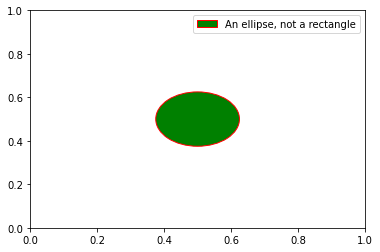

In [73]:
c = Ellipse((0.5, 0.5), 0.25, 0.25, facecolor="green",
                    edgecolor="red", linewidth=1)

fig, ax = plt.subplots()

ax.add_patch(c)
ax.legend([c], ["An ellipse, not a rectangle"],)
          # handler_map={mpatches.Circle: HandlerEllipse()})